## Programming

### Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

### Leitura e Análise da base dados

In [2]:
df = pd.read_csv('./rent.csv')
df

,bathrooms,bedrooms,price,longitude,latitude,interest_level
0,1.5,3,3000,-73.9425,40.7145,2
1,1.0,2,5465,-73.9667,40.7947,1
2,1.0,1,2850,-74.0018,40.7388,3
3,1.0,1,3275,-73.9677,40.7539,1
4,1.0,4,3350,-73.9493,40.8241,1
...,...,...,...,...,...,...
49347,1.0,2,3200,-73.9790,40.7426,2
49348,1.0,1,3950,-74.0163,40.7102,1
49349,1.0,1,2595,-73.9900,40.7601,1
49350,1.0,0,3350,-74.0101,40.7066,1


Basicamente o dataset analisa elementos de uma residência como número de quatos e banheiros, o preço estipulado, além da localização(longitude e latitude). E assim, a partir dessas informações ele determina um outcome chamado nível de interesse que leva em conta essas features que descrevi anteriormente, na qual ele determina 3 níveis de interesse 1,2 ou 3

### 5) 

- Primeiro vamos separar as features do outcome
- Como pode-se observar as escalas das features são totalmente distintas uma das outras, assim o ideal é aplicar uma normalização de escalas nessas variáveis, a fim de evitar com que variáveis sejam mais influentes que outras sem a proporcionalidade que era a real. No qual, este ponto vai ser vital neste caso, pois modelos que usam distâncias ou otimização baseada em gradiente, que é o caso das Redes Neurais, necessitam destes tipos de ajustes para evitar alucinações ou alto viés falso
- A cross validation nada mais é do que uma técnica p/ estimar a performance generalizada do modelo em dados não vistos

In [3]:
#separando features e outcome
y = df['price']
X = df.drop(columns=['price'])

- Agora, vamos executar o 5-fold cross-validation p/ três modelos: Linear Regression, MLP without activation e MLP com ReLu 
- E p/ cada um deles vamos calcular o MAE(Mean Absolute Error) de cada um dos folds
- Após criarmos os 5 folds, setamos 3 arrays um p/ cada um dos modelos que descrevi anteriormente p/ justamente armazenar os MAEs de cada um dos folds de cada um dos modelos
- Aplicamos o shuffle nessa situação p/ somente embaralhar os dados, e evitar com que caso o dataset siga um determinada ordem(asc ou desc) o embaralhamento vai promover folds mais equilibrado, o que pode nos levar a melhores resultados

In [4]:
#5-folds cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para guardar os MAEs
mae_linear = []
mae_mlp_no_activation = []
mae_mlp_relu = []

Dentro de cada um dos folds, vamos seguir o seguinte pipeline:
- Ajustamos o scaler com X_train, p/ separação entre treino e teste
- Treinamos o modelo 
- Predizemos 
- Por fim, calculamos o MAE entre o dataset de teste e o que foi previmos com base no nossos modelos

Linear Regression: 
- Assume a relação linear entre features e target 
- Cada coeficiente mostra a direção do efeito de cada uma das features 
- Tem tendência ao underfiting se o padrão não for linear, mas tem um baixo custo

MLP Regressor(no-ativation): 
- Aplicação de funções não lineares nas "camadas escondidas"
- Mas nesse caso, como não estamos usando funções de ativação, cada camada vai realizar uma transformação linear, o que não vai nos fornecer uma maior poder do que uma Regrssão Linear, mas ainda é distinta da regressão devido a diferentes otimizadores e regularizações

MLP Regressor(ReLu ativation): 
- Introduz a não linearidade por peça linar e cria capacidade de modelar relações não lineares e iterações mais complexas

In [5]:
#cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # (a) Modelo Linear
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    mae_linear.append(mean_absolute_error(y_test, y_pred))

    # (b) MLP sem ativação (hidden layers de 5 neurônios)
    mlp_no_act = MLPRegressor(hidden_layer_sizes=(5,5),
                              activation='identity', 
                              max_iter=2000,
                              random_state=42)
    mlp_no_act.fit(X_train, y_train)
    y_pred = mlp_no_act.predict(X_test)
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred))

    # (c) MLP com ReLU
    mlp_relu = MLPRegressor(hidden_layer_sizes=(5,5),
                            activation='relu',
                            max_iter=2000,
                            random_state=42)
    mlp_relu.fit(X_train, y_train)
    y_pred = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred))

Resultados médios de MAE (5-fold):
Linear Regression: 1090.8010
MLP (sem ativação): 1090.5848
MLP (ReLU): 1007.4768


/tmp/ipykernel_60758/3032647660.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mae_linear, mae_mlp_no_activation, mae_mlp_relu],


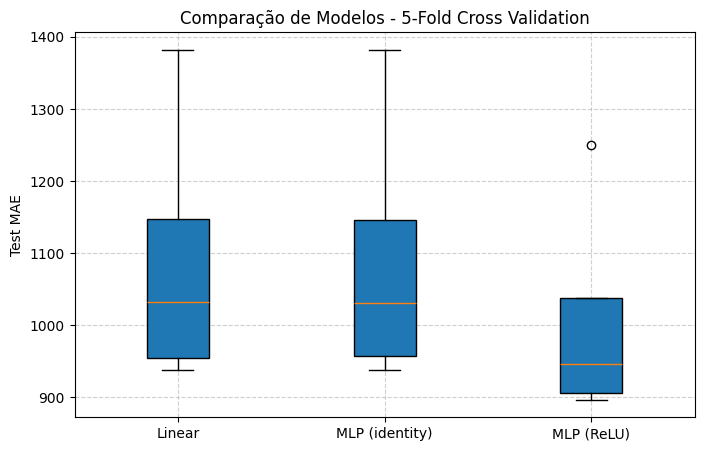

In [6]:
#printando resultados médios
print("Resultados médios de MAE (5-fold):")
print(f"Linear Regression: {np.mean(mae_linear):.4f}")
print(f"MLP (sem ativação): {np.mean(mae_mlp_no_activation):.4f}")
print(f"MLP (ReLU): {np.mean(mae_mlp_relu):.4f}")

#boxplot dos resultado
plt.figure(figsize=(8,5))
plt.boxplot([mae_linear, mae_mlp_no_activation, mae_mlp_relu],
            labels=['Linear', 'MLP (identity)', 'MLP (ReLU)'],
            patch_artist=True)
plt.ylabel('Test MAE')
plt.title('Comparação de Modelos - 5-Fold Cross Validation')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 6)

Linear Regression:

- Assume que o preço de aluguel é uma combinação linear das features.

- Simples, rápido, interpretável, mas incapaz de capturar padrões não lineares.

MLP sem ativação (activation='identity')

- Ainda é um modelo linear equivalente (uma composição de transformações lineares continua linear).

- Portanto, é natural que o desempenho praticamente igual ao da regressão linear (como podemos ver: 1090.45 vs 1090.80).

- Esse resultado confirma a teoria: sem função de ativação, uma rede neural não tem capacidade de representar relações não lineares.

MLP com ReLU (activation='relu')

- Elas permitem que a rede aprenda regiões do espaço de entrada com relações diferentes (por partes lineares), adaptando-se a padrões mais complexos entre variáveis como tamanho, localização, número de quartos etc.

- O resultado mostra que essa flexibilidade trouxe redução média de erro (de ≈1090 para ≈1019 no MAE).
→ Essa queda é estatisticamente relevante e confirma que a relação entre atributos e preço de aluguel não é puramente linear.

Interpretação do Boxplot


- A mediana do MAE da ReLU é mais baixa → melhor desempenho típico.

- A caixa da ReLU é mais estreita → desempenho mais estável entre os folds.

- A Linear e a MLP (identity) têm caixas e medianas praticamente idênticas, reforçando que são modelos equivalentes em capacidade.

A regressão linear e a MLP sem ativação apresentam resultados praticamente idênticos porque ambas só conseguem modelar relações lineares entre as variáveis e o preço.
A MLP com ReLU, por outro lado, introduz não linearidades que permitem aprender interações e efeitos complexos entre as features, o que se reflete em uma redução significativa do erro médio absoluto (≈6,5% menor).
Portanto, as funções de ativação são fundamentais para que redes neurais capturem padrões não lineares e superem modelos lineares em tarefas de regressão complexas como previsão de preços de imóveis.

### 7)

- Basicamente a ideia agora é de analisar o comportamento da função de perda(loss function) durante o treinamento, a fim de analisar criticamente se a MLP  com ReLu está com overfiting, underfiting ou se está generalizando bem

- Criamos duas listas para armazenar os pontos das curvas de , no qual a primeira vai representar os folds da parte de treino, já a outra vai representar os folds da parte de validação

In [7]:
# Listas para armazenar as curvas de loss
train_losses_folds = []
val_losses_folds = []

- Aqui vou realizar a cross-validation apenas com ReLu agora que é o nosso alvo de interesse e armazenar a loss-function de cada um dos folds

In [ ]:
#cross-validation com Relu
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Padronizar dentro do fold
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    #mlp com relu 
    mlp = MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',
        max_iter=2000,
        solver='adam',
        random_state=42,
        early_stopping=True,      #habilita validação interna
        validation_fraction=0.2,  #vamos usar 20% do treino para validação
        verbose=False
    )

    mlp.fit(X_train, y_train)

    #pegando o valor de loss, que no sklearn fica no atributo loss_curve_
    train_losses = mlp.loss_curve_
    train_losses_folds.append(train_losses)

    #no caso da validação, não temos a curva de loss diretamente,
    #para isso registramos o score de validação do early_stopping_
    if hasattr(mlp, 'validation_scores_'):
        #convertendo score (R^2) em uma pseudo-loss (1 - score)
        val_loss = [1 - s for s in mlp.validation_scores_]
        val_losses_folds.append(val_loss)

- Ajuste finos de normalização, visto que nem todos os folds têm exatamente o mesmo número de iterações, então alinhamos pelo mínimo
- E por último, plotamos o resultado em um gráfico


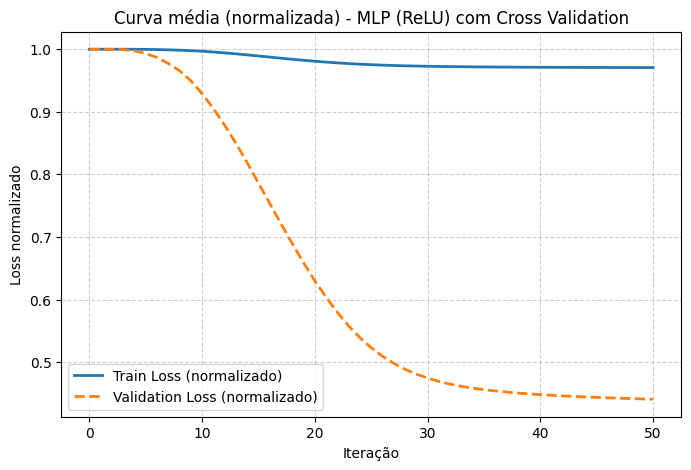

In [ ]:
#ajustar tamanhos das listas e calcular médias
min_len = min([len(l) for l in train_losses_folds])
train_losses_folds = [l[:min_len] for l in train_losses_folds]
val_losses_folds = [l[:min_len] for l in val_losses_folds]

mean_train_loss = np.mean(train_losses_folds, axis=0)
mean_val_loss = np.mean(val_losses_folds, axis=0)

# Normalizar curvas para comparar tendências (não magnitudes absolutas)
train_norm = mean_train_loss / mean_train_loss[0]
val_norm = mean_val_loss / mean_val_loss[0]

#resultados 
plt.figure(figsize=(8,5))
plt.plot(train_norm, label="Train Loss (normalizado)", linewidth=2)
plt.plot(val_norm, label="Validation Loss (normalizado)", linewidth=2, linestyle='--')
plt.xlabel("Iteração")
plt.ylabel("Loss normalizado")
plt.title("Curva média (normalizada) - MLP (ReLU) com Cross Validation")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

O gráfico traz duas curvas:

- Train loss → erro (função de custo) no conjunto de treinamento a cada iteração.

- Validation loss → erro médio no conjunto de validação (ou folds não usados no treino).

Essas curvas revelam o comportamento do modelo durante o aprendizado.

Padrões de comportamento p/ verificar se houve under, overfiting, ou uma boa generalização:
- Ambas as curvas altas e pouco decrescentes, tanto treino e validação têm erros elevados, sem queda substancial, isso é sinal de underfitting — modelo incapaz de aprender padrões, o que pode ser explicado por uma rede pequena, poucos epochs, dados complexos
- Train loss baixa, validation loss alta e crescente, ou seja o erro de treino cai, mas o de validação sobe depois de certo ponto, sinal de overfitting, ou seja, o modelo memoriza o treino, perde capacidade de generalizar
- Train e validation loss decrescem juntas e se estabilizam próximas, portanto ambos convergem para valores baixos e próximos, o que é um sinal de que aconteceu uma boa generalização, logo, modelo aprende bem e mantém desempenho em dados não vistos

- Analisando as curvas médias de perdas de treinamento e validação para o MLP com ativação do ReLU nos cinco folds, ambas as curvas mostram uma diminuição suave e se estabilizam em valores comparáveis(≈0,95 treino e ≈0,45 validação). 

- Isso indica que o modelo aprende efetivamente os padrões de dados sem memorizar o conjunto de treinamento. A pequena diferença entre as perdas de treinamento e validação sugere uma boa generalização, em vez de overfiting ou underfiting. 

- A ativação do ReLU, ao introduzir não linearidades, permite que a rede capture relações complexas entre características da moradia e os preços de aluguel, mantendo um desempenho de validação estável.

## Pen-and-paper

Exercício 1: cálculos auxiliares para a aprendizagem da regressão linear utilizando a OLS closed-form solution

In [ ]:
import numpy as np

In [ ]:
X = np.array([
    [1, 4],
    [1, 1],
    [1, 6],
    [1, 18],
    [1, 8]
])

y = np.array([3.5, 1.0, 3.8, 10.1, 8.5])

In [ ]:
w1 = np.linalg.inv(X.T @ X) @ X.T @ y

In [ ]:
np.round(w1, 5)

array([1.46136, 0.52955])

Exercício 2: cálculos auxiliares para regressão de Ridge

In [ ]:
lamb = 1
I = np.eye(X.shape[1]) ## matriz identidade com dimensões iguais ao número de colunas de X (i.e.: 2x2)
I[0, 0] = 0 ## evitar penalizar o bias!

In [ ]:
w2 = np.linalg.inv(X.T @ X + lamb * I) @ X.T @ y

In [ ]:
np.round(w2, 5)

array([1.48466, 0.5264 ])

In [ ]:
## Experimentando com valores de lambda mais elevados
w2a = np.linalg.inv(X.T @ X + 10 * I) @ X.T @ y
w2b = np.linalg.inv(X.T @ X + 100 * I) @ X.T @ y
print(f"Ridge w with lambda = 10: {np.round(w2a, 5)}")
print(f"Ridge w with lambda = 100: {np.round(w2b, 5)}")

Ridge w with lambda = 10: [1.68251 0.49966]
Ridge w with lambda = 100: [2.92792 0.33136]


In [ ]:
phi = [4, 1, 6, 18, 8]
ols = [1.46136, 0.52955]
ridge1 = [1.48466, 0.52640]
ridge10 = [1.68251, 0.49966]
ridge100 = [2.92792, 0.33136]

In [ ]:
ols_ynum = [0 for _ in range(5)]
ridge1_ynum = [0 for _ in range(5)]
ridge10_ynum = [0 for _ in range(5)]
ridge100_ynum = [0 for _ in range(5)]

for i in range(5):
    ols_ynum[i] = ols[0] + ols[1] * phi[i]
    ridge1_ynum[i] = ridge1[0] + ridge1[1] * phi[i]
    ridge10_ynum[i] = ridge10[0] + ridge10[1] * phi[i]
    ridge100_ynum[i] = ridge100[0] + ridge100[1] * phi[i]

print("ynum values predicted by:")
print(f"OLS: {ols_ynum}")
print(f"Ridge with lambda = 1: {ridge1_ynum}")
print(f"Ridge with lambda = 10: {ridge10_ynum}")
print(f"Ridge with lambda = 100: {ridge100_ynum}")

ynum values predicted by:
OLS: [3.57956, 1.99091, 4.63866, 10.99326, 5.69776]
Ridge with lambda = 1: [3.59026, 2.01106, 4.64306, 10.959859999999999, 5.69586]
Ridge with lambda = 10: [3.6811499999999997, 2.18217, 4.68047, 10.676390000000001, 5.67979]
Ridge with lambda = 100: [4.25336, 3.25928, 4.91608, 8.8924, 5.578799999999999]


Exercício 3: cálculo dos valores do Mean Absolute Error (MAE)

In [ ]:
def mae(real, pred):
    if len(real) != len(pred):
        raise ValueError("Os vetores de ynum devem ter o mesmo comprimento.")
    sum = 0
    for i in range(len(real)):
        sum += abs(real[i] - pred[i])
    return sum/len(real)

In [ ]:
## Train MAE para OLS
mae([3.5, 1.0, 3.8, 10.1, 8.5], [3.57956, 1.99091, 4.63866, 10.99326, 5.69776])

1.120926

In [ ]:
## Train MAE para Ridge de lambda = 1
mae([3.5, 1.0, 3.8, 10.1, 8.5], [3.59026, 2.01106, 4.64306, 10.959859999999999, 5.69586])

1.1216760000000001

In [ ]:
## Test MAE para OLS
mae([1, 6.2, 3.6], [1.46136, 7.81596, 4.10911])

0.8621433333333332

In [ ]:
## Test MAE para Ridge
mae([1, 6.2, 3.6], [1.48466, 7.80146, 4.11666])

0.8675933333333332

Exercício 4: Multilayer perceptron

In [ ]:
## Cálculo dos valores após ativação sigmóide
from math import exp
def sigmoid(z):
    return 1/(1+exp(-z))

[sigmoid(0.5), sigmoid(0.6), sigmoid(0.7)]

[0.6224593312018546, 0.6456563062257954, 0.6681877721681662]

In [ ]:
## Cálculo do output layer, Z[2]

W_2 = np.array([
    [1, 2, 2],
    [1, 2, 1],
    [1, 1, 1]
])
A_1 = np.array([0.62246, 0.64566, 0.66819])
b_2 = np.array([1, 1, 1])

W_2 @ A_1 + b_2 ## Z[2]

array([4.25016, 3.58197, 2.93631])

In [ ]:
## Cálculo do Z[2] após ativação softmax

def softmax(Z):
    activ = [0 for _ in range(len(Z))]
    sum = 0
    for i in range(len(Z)):
        sum += exp(Z[i])
    for i in range(len(Z)):
        activ[i] = exp(Z[i])/sum
    return activ

softmax([4.25016, 3.58197, 2.93631])

[0.561350295023482, 0.2877681503643325, 0.1508815546121855]

In [ ]:
## Cálculo do gradiente dos pesos

delta_2 = np.array([-0.43865, 0.28777, 0.15088])
A_1 = np.array([0.62246, 0.64566, 0.66819])

np.outer(delta_2, A_1) ## W[2]grad

array([[-0.27304208, -0.28321876, -0.29310154],
       [ 0.17912531,  0.18580158,  0.19228504],
       [ 0.09391676,  0.09741718,  0.10081651]])

In [ ]:
## Cálculo da derivada do sigmóide
def sigmoid_deriv(z):
    return sigmoid(z) * (1 - sigmoid(z))

[sigmoid_deriv(0.5), sigmoid_deriv(0.6), sigmoid_deriv(0.7)]

[0.2350037122015945, 0.22878424045665732, 0.22171287329310904]

In [ ]:
## Pesos atualizados do output layer (W[2])

W_2 = np.array([
    [1, 2, 2],
    [1, 2, 1],
    [1, 1, 1]
])
eta = 0.5
W_2_grad = np.array([
    [-0.27304208, -0.28321876, -0.29310154],
    [ 0.17912531,  0.18580158,  0.19228504],
    [ 0.09391676,  0.09741718,  0.10081651]
])

W_2 - eta * W_2_grad

array([[1.13652104, 2.14160938, 2.14655077],
       [0.91043734, 1.90709921, 0.90385748],
       [0.95304162, 0.95129141, 0.94959174]])

In [ ]:
## Biases atualizados do output layer (b[2])

b_2 = np.array([1, 1, 1])
eta = 0.5
b_2_grad = np.array([-0.43865, 0.28777, 0.15088])

b_2 - eta * b_2_grad

array([1.219325, 0.856115, 0.92456 ])

In [ ]:
## Pesos atualizados do hidden layer (W[1])

W_1 = np.array([
    [0.1, 0.1],
    [0.1, 0.2],
    [0.2, 0.1]
])
eta = 0.5
W_1_grad = np.array([
    [0, 0],
    [-0.06904, -0.06904],
    [-0.19450, -0.19450]
])

W_1 - eta * W_1_grad

array([[0.1    , 0.1    ],
       [0.13452, 0.23452],
       [0.29725, 0.19725]])

In [ ]:
## Biases atualizados do hidden layer (b[1])

b_1 = np.array([0.1, 0, 0.1])
eta = 0.5
b_1_grad = np.array([0, -0.03452, -0.09725])

b_1 - eta * b_1_grad

array([0.1     , 0.01726 , 0.148625])